#In this tutorial, we will apply machine learning algorithms to perform a classification task using the 'Titanic' dataset to predict whether a passenger will survive based on various attributes. We will use several machine learning algorithms including Logistic Regression, Decision Tree, Support Vector Machine and perform comparisons among them.

##1. First, we will need to download the dataset from Google Drive

In [ ]:
try:
    import gdown
except ImportError:
    !pip install gdown
    import gdown
import gdown

# File ID from your Google Drive link
file_id = '1b7_g2DfgBcJ3hy0sETAgLLF1wBbf_1bS'
# URL to download the file
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
dataset = 'titanic.csv'  # Specify the output file name
gdown.download(url, dataset, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1b7_g2DfgBcJ3hy0sETAgLLF1wBbf_1bS
To: /content/titanic.csv
100%|██████████| 106k/106k [00:00<00:00, 25.0MB/s]


'titanic.csv'

#2. Clean the dataset by removing empty columns

In [ ]:
import pandas as pd

# Load the dataset
data_frame = pd.read_csv('titanic.csv')

# Remove rows where any cell in the specified columns empty
data_frame_cleaned = data_frame.dropna(subset=['survived', 'gender', 'age', 'fare', 'num_siblings', 'num_parents'])

# Save the cleaned data to a new CSV file
data_frame_cleaned.to_csv('titanic_cleaned.csv', index=False)

##2.1. Dataset after cleaning

In [ ]:
# Get the number of records
num_records_before = data_frame.shape[0]
num_records_after = data_frame_cleaned.shape[0]

# Print the number of records
print(num_records_before)
print(num_records_after)

1309
1045


#3. Split the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

#'survived' is the target variable
X = data_frame_cleaned.drop('survived', axis=1)
y = data_frame_cleaned['survived']

# Split the data into training and testing sets. 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##3.1 Show the distribution after splitting

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(836, 13)
(209, 13)
(836,)
(209,)


#3. Apply logistic regression to train and predict the survival of passengers

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Use X_train, X_test, y_train, y_test those are already defined in previous step

# Select features for the model
features = ['gender', 'age', 'fare', 'num_siblings', 'num_parents']

# Extract the features from the training and testing sets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Encode the 'gender' feature to numerical values
label_encoder = LabelEncoder()
X_train_selected['gender'] = label_encoder.fit_transform(X_train_selected['gender'])
X_test_selected['gender'] = label_encoder.transform(X_test_selected['gender'])

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Save the trained model using pickle
filename = 'logistic_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

<ipython-input-9-22ac5142196d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['gender'] = label_encoder.fit_transform(X_train_selected['gender'])
<ipython-input-9-22ac5142196d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['gender'] = label_encoder.transform(X_test_selected['gender'])


##3.1. Use the saved model to make predictions on the test dataset and calculate the accuracy, precision, recall, F1 score and confusion matrix.

In [ ]:
# Load the saved model
loaded_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Make predictions on the test set
y_pred = loaded_model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.722488038277512
Precision: 0.6756756756756757
Recall: 0.5952380952380952
F1 Score: 0.6329113924050633
Confusion Matrix:
 [[101  24]
 [ 34  50]]


#4. Apply Decision Tree to predict the survival of the passengers

In [ ]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Use X_train, X_test, y_train, y_test are already defined in a previous step

# Select features for the model
features = ['gender', 'age', 'fare', 'num_siblings', 'num_parents']

# Extract the selected features from the training and testing sets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Encode the 'gender' feature to numerical values
label_encoder = LabelEncoder()
X_train_selected['gender'] = label_encoder.fit_transform(X_train_selected['gender'])
X_test_selected['gender'] = label_encoder.transform(X_test_selected['gender'])

# Initialize and train the decision tree classifier model
model = DecisionTreeClassifier()
model.fit(X_train_selected, y_train)

# Save the trained model using pickle
filename = 'decision_tree_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


##4.1. Use the saved model to make predictions on the test dataset and calculate the accuracy, precision, recall, F1 score and confusion matrix.

In [ ]:
# Load the saved model
loaded_model = pickle.load(open('decision_tree_model.pkl', 'rb'))

# Make predictions on the test set
y_pred = loaded_model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7511961722488039
Precision: 0.6987951807228916
Recall: 0.6823529411764706
F1 Score: 0.6904761904761905
Confusion Matrix:
 [[99 25]
 [27 58]]


#5. Apply Support Vector Machine to predict the survival of the passenger

In [ ]:
import pickle
from sklearn.svm import SVC  # Support Vector Machine (Support Vector Classifier)
from sklearn.preprocessing import LabelEncoder

# Use X_train, X_test, y_train, y_test are already defined in a previous step

# Select features for the model
features = ['gender', 'age', 'fare', 'num_siblings', 'num_parents']

# Extract the selected features from the training and testing sets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Encode the 'gender' feature to numerical values
label_encoder = LabelEncoder()
X_train_selected['gender'] = label_encoder.fit_transform(X_train_selected['gender'])
X_test_selected['gender'] = label_encoder.transform(X_test_selected['gender'])

# Initialize and train the Support Vector Machine model
model = SVC()  # Support Vector Machine
model.fit(X_train_selected, y_train)

# Save the trained model using pickle
filename = 'svm_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


##5.1. Use the saved model to make predictions on the test dataset and calculate the accuracy, precision, recall, F1 score and confusion matrix.

In [ ]:
# Load the saved model
loaded_model = pickle.load(open('svm_model.pkl', 'rb'))

# Make predictions on the test set
y_pred = loaded_model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.6267942583732058
Precision: 0.5777777777777777
Recall: 0.3058823529411765
F1 Score: 0.4
Confusion Matrix:
 [[105  19]
 [ 59  26]]


#6. Plot all the evaluation results in one plot using stacked bar chart

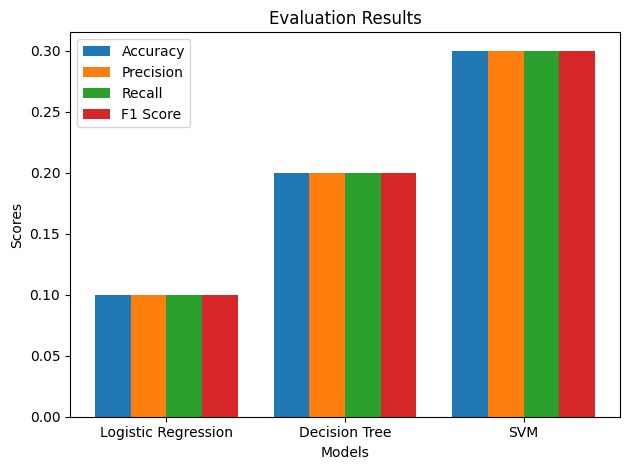

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation results
models = ['Logistic Regression', 'Decision Tree', 'SVM']
accuracy = [0.1, 0.2, 0.3]  # Replace with actual accuracy values
precision = [0.1, 0.2, 0.3]  # Replace with actual precision values
recall = [0.1, 0.2, 0.3]  # Replace with actual recall values
f1 = [0.1, 0.2, 0.3]  # Replace with actual F1 scores

# Stacked bar chart
fig, ax = plt.subplots()

# Bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Plotting the bars
bars1 = ax.bar(index - 1.5 * bar_width, accuracy, bar_width, label='Accuracy')
bars2 = ax.bar(index - 0.5 * bar_width, precision, bar_width, label='Precision')
bars3 = ax.bar(index + 0.5 * bar_width, recall, bar_width, label='Recall')
bars4 = ax.bar(index + 1.5 * bar_width, f1, bar_width, label='F1 Score')

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Results')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()
